### Library import

In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from MLP_utils import *

### Data import

In [2]:
pokemon = pd.read_csv("data/all_pokemon_data.csv")
pokemon["Legendary Status"] = pokemon["Legendary Status"].astype(int)
del pokemon["National Dex #"] # redondant column
del pokemon["Height (dm)"] # redondant column
del pokemon["Weight (hg)"] # redondant column
del pokemon["Base Stat Total"] # it is just the sum of all stat, not very new
del pokemon["Name"] # delet pokemon name (not needed)

## Data exploration

In [3]:
pokemonNumber = pokemon.select_dtypes(include = "number")

Text(0.5, 1.0, 'Pokemon numeric attributes correlation')

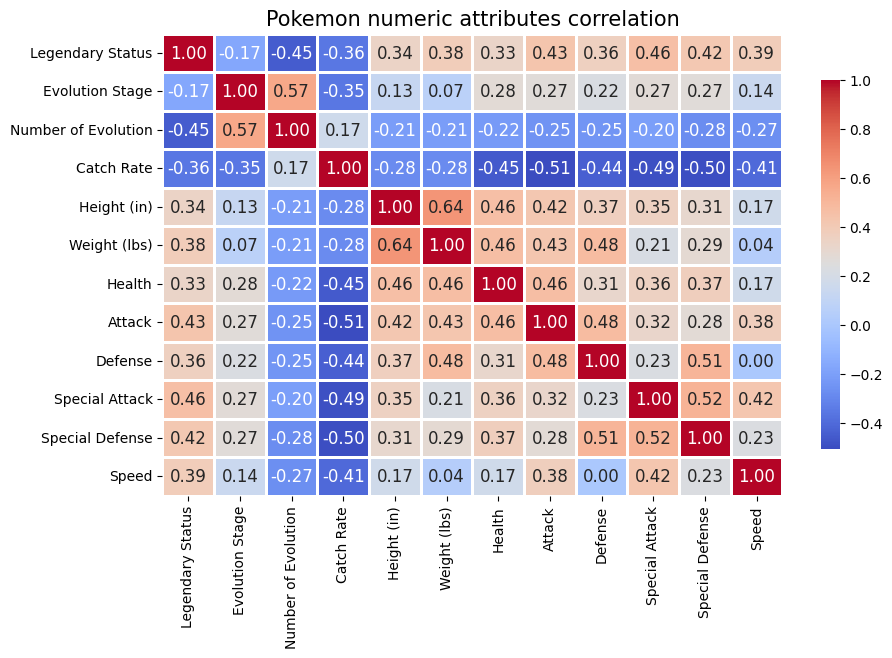

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pokemonNumber.corr(),
    annot=True,                   # Afficher les valeurs
    cmap="coolwarm",              # Palette de couleurs alternative plus lisible
    annot_kws={"size": 12},       # Augmente la taille des annotations
    fmt=".2f",                    # Format des nombres (2 décimales)
    linewidths=1,                 # Ajoute des lignes entre les cellules
    cbar_kws={"shrink": 0.8}      # Ajuste la taille de la barre de couleur
)
plt.title("Pokemon numeric attributes correlation", size = 15)

### Loading processed data

In [5]:
# X_train is a SMOTE object
# y_train is a SMOTE object
# X_test not a SMOTE object, but cat values has been converted into numeric vectors
# y_test is inchanged
X_train, y_train, X_test, y_test, preprocessor = prepareDataForMlp(pokemon)
X_train_df = encodedDataToDataFrame(preprocessor, X_train)
X_test_df = encodedDataToDataFrame(preprocessor, X_test)

### Processed data visualisation

- Numeric features

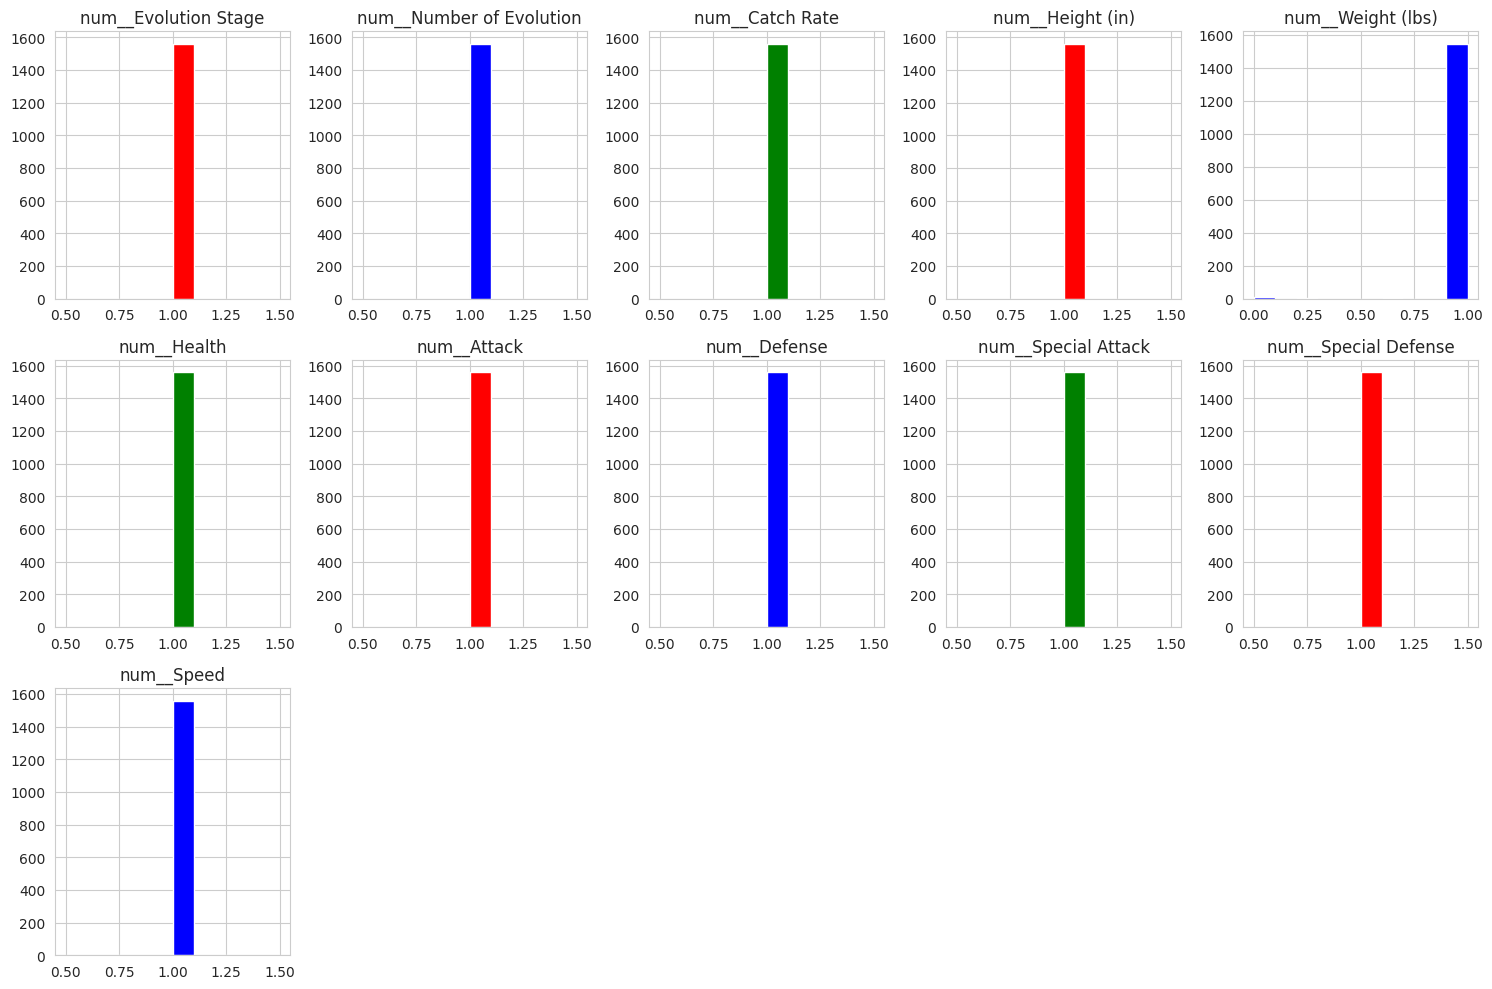

In [6]:
numDataDistribution(X_train_df, nbPlot= 11)

- Categorical features

/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)
/home/edmond/Documents/PytorchProjects/MLP/MLP_pytorch/MLP_utils.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(catColMinimal, rotation=90)


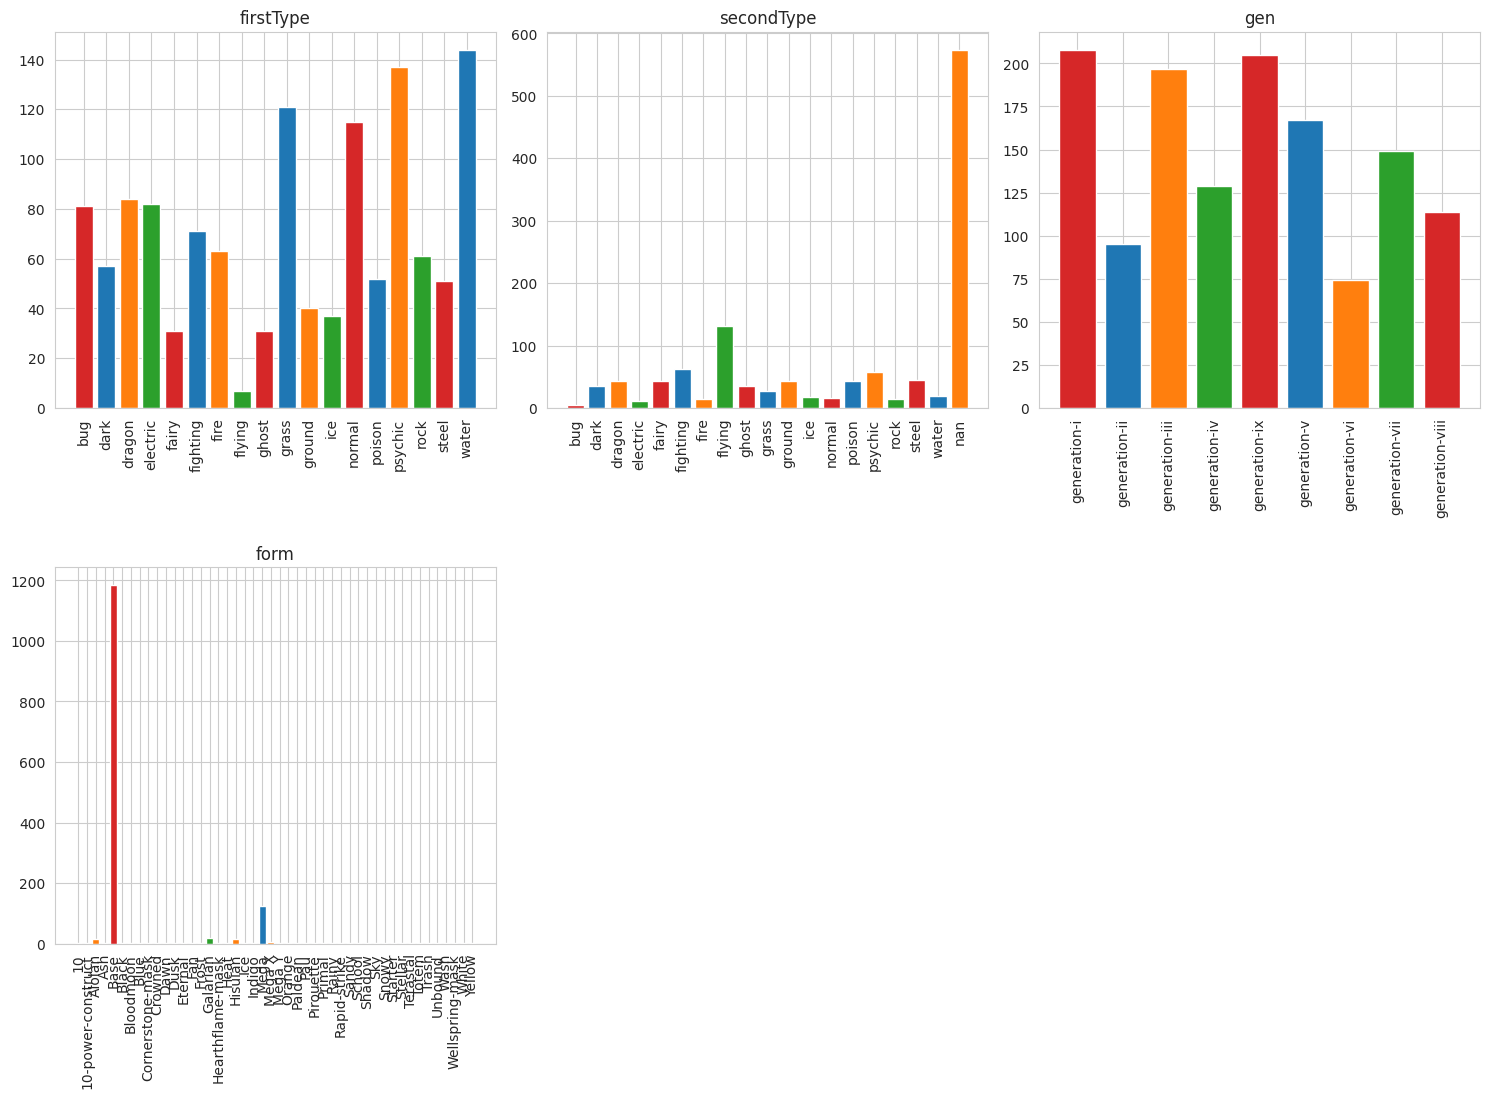

In [7]:
multiplePlot(X_train_df)

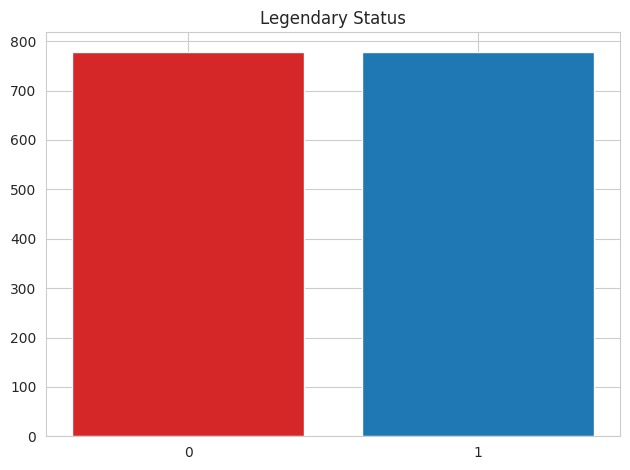

In [8]:
catLegendaryDistribution(pd.DataFrame(y_train))